### Test API

In [106]:
import requests

# Define the WDPAID to test
wdpa_id = 555666429

# Define the token
token = '_place_your_token'

# API endpoint
url = f"http://api.protectedplanet.net/v3/protected_areas/{wdpa_id}/?token={token}"

# Make the API request
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Extract the JSON data
    data = response.json()

    # Print the JSON data
    print(data)
else:
    print(f"Request failed for ID {wdpa_id}")


Request failed for ID 555666429


### Split df into chunks to extract data in batches

In [ ]:
import numpy as np

#split df NA and EU into parts
#df = pd.read_csv('WDPAID_Eu.csv')     # WDPAIDs in Eu df = ~166k; in NA df = ~55k 
#df_split = np.array_split(df, 9)

In [ ]:
# check if it works
#df_split[8]

### Extract Geom from API into a JSON file

In [ ]:
import pandas as pd
import requests
import json

# Read the CSV file
#df = pd.read_csv('WDPAID_As.csv')

# Read df split
#df = df_split[8]

# Define the token
token = '_your_token_' # or import your cred.py

# Create an empty list to store the results
results = []

# Loop through the IDs in the CSV file
for wdpa_id in df['WDPAID']:
    # Define the API endpoint
    url = f"http://api.protectedplanet.net/v3/protected_areas/{wdpa_id}/?token={token}"

    # Make the API request
    response = requests.get(url)

    # Check if the request was successful
    if response.status_code == 200:
        # Extract the JSON data
        data = response.json()

        # Extract the geometry
        geometry = data['protected_area']['geojson']['geometry']

        # Append the result to the results list
        results.append({'id': wdpa_id, 'geometry': geometry})
    else:
        print(f"Request failed for ID {wdpa_id}")

# Save the results to a new JSON file
with open('result_eu8.json', 'w') as f:
    json.dump(results, f)

### Transform multiple JSONs to shp and export it

I have extracted geometry data from the API in multiple batches for Europe and North America.

In [73]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import shape
import json

# Specify the JSON files you want to load
json_files = ['result_eu0.json', 'result_eu1.json', 'result_eu2.json',
             'result_eu3.json', 'result_eu4.json', 'result_eu5.json',
             'result_eu6.json', 'result_eu7.json', 'result_eu8.json']

# Initialize a list to store DataFrames
dfs = []

# Loop through the specified JSON files
for file in json_files:
    # Load the JSON data
    with open(file) as f:
        data = json.load(f)

    # Convert the data to a DataFrame and append to dfs list
    dfs.append(pd.DataFrame(data))

# Concatenate all dataframes in the dfs list
df = pd.concat(dfs, ignore_index=True)

# Convert the GeoJSON geometry to a shapely geometry
df['geometry'] = df['geometry'].apply(shape)

# Convert the DataFrame to a GeoDataFrame
gdf = gpd.GeoDataFrame(df, geometry='geometry')

# Check the types of geometries in the geometry column
geometry_types = gdf['geometry'].geom_type

# Print unique geometry types
print(geometry_types.unique())




['Polygon' 'MultiPolygon' 'Point']


In [74]:
# Create a GeoDataFrame for polygons and multipolygons
gdf_poly = gdf[gdf['geometry'].apply(lambda x: x.geom_type in ['Polygon', 'MultiPolygon'])]

# Create a GeoDataFrame for points
gdf_points = gdf[gdf['geometry'].geom_type == 'Point']

c:\users\pepin\appdata\local\programs\python\python39\lib\site-packages\geopandas\geoseries.py:645: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  result = super().apply(func, convert_dtype=convert_dtype, args=args, **kwargs)


In [89]:
gdf_poly.info()
#gdf_points['geometry'].iloc[0]
#gdf_poly['geometry'].iloc[166199]

#Save the GeoDataFrame to a shapefile
gdf_poly.to_file('poly_eu.shp')

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 166285 entries, 0 to 166287
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype   
---  ------    --------------   -----   
 0   id        166285 non-null  int64   
 1   geometry  166285 non-null  geometry
dtypes: geometry(1), int64(1)
memory usage: 3.8 MB


### Transform one JSON to shp and export it

In [62]:
import pandas as pd
import json
import geopandas as gpd
from shapely.geometry import shape
from shapely.geometry import Point, Polygon, LineString

# Load the one JSON data
with open('result_sa.json') as f:
    data = json.load(f)

# Convert the data to a DataFrame
df = pd.DataFrame(data)

# Convert the GeoJSON geometry to a shapely geometry
df['geometry'] = df['geometry'].apply(shape)

# Convert the DataFrame to a GeoDataFrame
gdf = gpd.GeoDataFrame(df, geometry='geometry')

# Check the types of geometries in the geometry column
geometry_types = gdf['geometry'].geom_type

# Print unique geometry types
print(geometry_types.unique())


['Polygon' 'MultiPolygon' 'Point']


In [63]:
# Create a GeoDataFrame for polygons and multipolygons
gdf_poly = gdf[gdf['geometry'].apply(lambda x: x.geom_type in ['Polygon', 'MultiPolygon'])]

# Create a GeoDataFrame for points
gdf_points = gdf[gdf['geometry'].geom_type == 'Point']


c:\users\pepin\appdata\local\programs\python\python39\lib\site-packages\geopandas\geoseries.py:645: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  result = super().apply(func, convert_dtype=convert_dtype, args=args, **kwargs)


In [65]:
#gdf_points.head()
#gdf_points['geometry'].iloc[1]

#Save the GeoDataFrame to a shapefile
#gdf_poly.to_file('poly_na.shp')
#gdf_points.to_file('points_na.shp')

Import your shp/geojson to check whether the geometries are printed as they should. If not then use mapshaper.

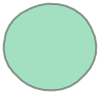

In [41]:
import geopandas as gpd
import pandas as pd
gdf = gpd.read_file('result_nsp.shp')
#gdf.head()
gdf['geometry'].iloc[1]

# Print the first Point() in the 'geometry' column
#for idx, row in gdf.iterrows():
#    if row['geometry'].geom_type == 'Point':
#        print(f"Row {idx} contains a Point geometry.")
#        break 

Import your shp files into mapshaper.org, to repair some geometries that could cause issues later on. Export it.

### Export as csv if needed.

In [83]:
import pandas as pd
import json
from shapely.geometry import shape

# Load the JSON data
with open('result_NSp.json') as f:
    data = json.load(f)

# Convert the data to a DataFrame
df = pd.DataFrame(data)

# Convert the GeoJSON geometry to WKT format
df['geometry'] = df['geometry'].apply(lambda g: shape(g).wkt)

# Print the DataFrame
#df.head(40)
#print(df.iloc[16])

# export as csv
#df.to_csv('result_nsp.csv')

id                                                  555697868
geometry    MULTIPOLYGON (((68.993 -46.493, 69 -46.5, 72 -...
Name: 16, dtype: object
